# Day 4

### Breakout exercise: Practice with Selection

Assume Pandas has been imported and the Gapminder GDP data for Europe has been loaded.
Write an expression to select each of the following:

1.  GDP per capita for all countries in 1982.
2.  GDP per capita for Denmark for all years.
3.  GDP per capita for all countries for years *after* 1985.
4.  GDP per capita for each country in 2007 as a multiple of
GDP per capita for that country in 1952.

#### Bonus exercise:

Python includes a `dir()` function that can be used to display all of the available methods (functions) that are built into a data object.  In Episode 4, we used some methods with a string. But we can see many more are available by using `dir()`:

~~~
my_string = 'Hello world!'   # creation of a string object
dir(my_string)
~~~

This command returns:

~~~
['__add__',
...
'__subclasshook__',
'capitalize',
'casefold',
'center',
...
'upper',
'zfill']
~~~

You can use `help()` or <kbd>Shift</kbd>+<kbd>Tab</kbd> to get more information about what these methods do.

Assume Pandas has been imported and the Gapminder GDP data for Europe has been loaded as `data`.  Then, use `dir()`
to find the function that prints out the median per-capita GDP across all European countries for each year that information is available.


In [1]:
import pandas as pd

In [2]:
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


Let's make a subset:

In [3]:
subset = data_europe.loc['Italy':'Poland', 'gdpPercap_1962':'gdpPercap_1972']
subset

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Italy,8243.582340,10022.401310,12269.273780
Montenegro,4649.593785,5907.850937,7778.414017
Netherlands,12790.849560,15363.251360,18794.745670
Norway,13450.401510,16361.876470,18965.055510
Poland,5338.752143,6557.152776,8006.506993


Let's see in which country within the subset, the gdp is larger than 10,000

In [4]:
subset > 10000

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Italy,False,True,True
Montenegro,False,False,False
Netherlands,True,True,True
Norway,True,True,True
Poland,False,False,False


This will return `True` or `False` for each element in the subset, depending on whether it is greater than 10,000. We can save those trues and falses in a mask to select the data in the subset where the value is above 10,000. 

In [5]:
mask = subset > 10000
subset[mask]

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Italy,NaN,10022.40131,12269.27378
Montenegro,NaN,NaN,NaN
Netherlands,12790.84956,15363.25136,18794.74567
Norway,13450.40151,16361.87647,18965.05551
Poland,NaN,NaN,NaN


We can use `describe` to check this subsetted dataset:

In [6]:
masked_subset = subset[mask]
masked_subset.describe()

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
count,2.000000,3.000000,3.000000
mean,13120.625535,13915.843047,16676.358320
std,466.373656,3408.589070,3817.597015
min,12790.849560,10022.401310,12269.273780
25%,12955.737547,12692.826335,15532.009725
50%,13120.625535,15363.251360,18794.745670
75%,13285.513523,15862.563915,18879.900590
max,13450.401510,16361.876470,18965.055510


Comparing it to the original subset (This describes the entire subset, without having masked it. )

In [7]:
subset.describe()

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
count,5.000000,5.000000,5.000000
mean,8894.635868,10842.506571,13162.799194
std,4093.410673,4855.106424,5517.298708
min,4649.593785,5907.850937,7778.414017
25%,5338.752143,6557.152776,8006.506993
50%,8243.582340,10022.401310,12269.273780
75%,12790.849560,15363.251360,18794.745670
max,13450.401510,16361.876470,18965.055510


### Plotting

Matplotlib is the most common plotting library in Python. It can do a lot of complicated things, and one of its strengths is that you can use it with pandas. But we can also use it without pandas:

In [8]:
import matplotlib.pyplot as plt

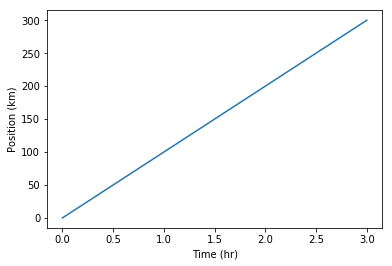

In [10]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()

If you do not specify which plot this applies to, Matplotlib always automatically changes the latest plot that was created with the code that is written. 

Let's plot some data!

In [11]:
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

In [12]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


We would like our x-values to be the year in the column names, and our y-values to be the GDPs in the table.

In order to do that, we need to convert the column name string into a number. 

In [13]:
years = data.columns.str.strip('gdpPercap_')
years

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')

Only doing this only strips the non-numeric characters from the string, but it is still a string. If we want to treat it like a number, we need to convert it to one. Luckily, pandas can do this for us. 

In [14]:
years_num = years.astype(int)
years_num

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')

Now we have our years converted to numbers! Let's make sure we assign these to our column names.


In [15]:
data.columns = years_num
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


We did a lot of work, but now we can plot our data with a single line of code.

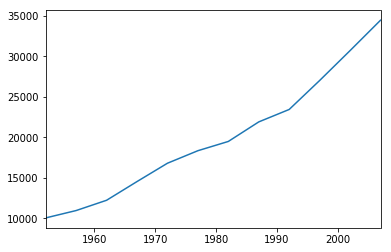

In [16]:
data.loc['Australia'].plot()

This plots the column names on the x-axis, and the gdp values on the y-axis. 

You may want to treat both countries at the same time, and think that this is what does it:

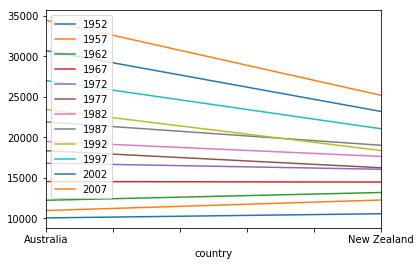

In [17]:
data.plot()

But unfortunately, it plots the axes the wrong way around! You first need to transpose the data. 

By default, the rows will be treated as x-values. If you do not want the rows as x-values, you need to transpose your data. 

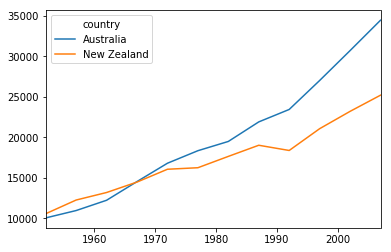

In [18]:
data.T.plot()

This gives us the plot we wanted. 

We can change the styles in different ways! One example is to make it look like ggplot in R. 

Text(0, 0.5, 'GDP per capita')

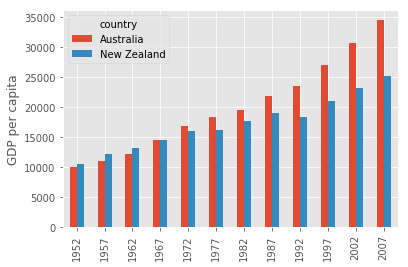

In [19]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

Let's plot Australia only:

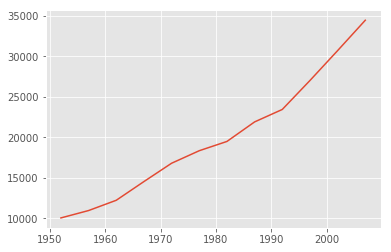

In [20]:
years = data.columns
gdp_australia = data.loc['Australia']
plt.plot(years, gdp_australia)

It remembers that we used the ggplot style now! 

If we wanted to make the same plot without pandas, this is what you would do:

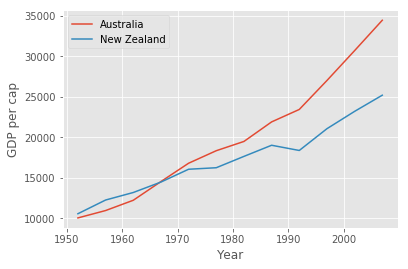

In [21]:
gdp_nz = data.loc['New Zealand']

plt.plot(years, gdp_australia, label='Australia')
plt.plot(years, gdp_nz, label='New Zealand')
plt.xlabel('Year')
plt.ylabel('GDP per cap')
plt.legend(loc='upper left')

we can also create a scatterplot:

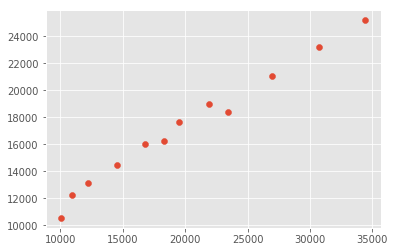

In [22]:
plt.scatter(gdp_australia, gdp_nz)

This creates the GDPs of NZ against the GDPs of Australia for each corresponding year


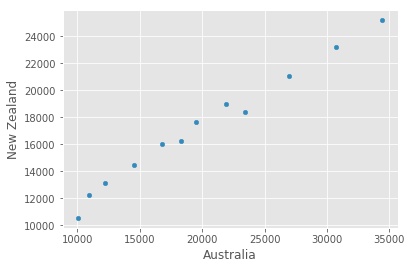

In [23]:
data.T.plot.scatter(x='Australia', y='New Zealand')

### Breakout exercise: Minima and Maxima

Fill in the blanks below to plot the minimum GDP per capita over time
for all the countries in Europe.
Modify it again to plot the maximum GDP per capita over time for Europe.

~~~
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.____.plot(label='min')
data_europe.____
plt.legend(loc='best')
plt.xticks(rotation=90)
~~~


### Breakout exercise: Correlations

Modify the example in the notes to create a scatter plot showing
the relationship between the minimum and maximum GDP per capita
among the countries in Asia for each year in the data set.
What relationship do you see (if any)?

In [24]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')

In [25]:
data_asia.T.min()

country
Afghanistan             635.341351
Bahrain                9867.084765
Bangladesh              630.233627
Cambodia                368.469286
China                   400.448611
Hong Kong China        3054.421209
India                   546.565749
Indonesia               749.681655
Iran                   3035.326002
Iraq                   3076.239795
Israel                 4086.522128
Japan                  3216.956347
Jordan                 1546.907807
Korea Dem. Rep.        1088.277758
Korea Rep.             1030.592226
Kuwait                28118.429980
Lebanon                4834.804067
Malaysia               1810.066992
Mongolia                786.566857
Myanmar                 331.000000
Nepal                   545.865723
Oman                   1828.230307
Pakistan                684.597144
Philippines            1272.880995
Saudi Arabia           6459.554823
Singapore              2315.138227
Sri Lanka              1072.546602
Syria                  1643.485354
Taiwan      

This gives the minimum for each country over all years. 

In [26]:
data_asia.min()

gdpPercap_1952    331.0
gdpPercap_1957    350.0
gdpPercap_1962    388.0
gdpPercap_1967    349.0
gdpPercap_1972    357.0
gdpPercap_1977    371.0
gdpPercap_1982    424.0
gdpPercap_1987    385.0
gdpPercap_1992    347.0
gdpPercap_1997    415.0
gdpPercap_2002    611.0
gdpPercap_2007    944.0
dtype: float64

This gives the minimum for all countries for all years. 